### Importing the Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv('credit-g_csv.csv')
#df=pd.read_csv('German_data.csv')

In [20]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [21]:
df.shape

(1000, 21)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [23]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [24]:
# df.isnull().sum().sort_values(ascending=False)

In [25]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [26]:

for i in categorical_data.columns:
    print(i,'\t',df[i].unique())
    print()
    

checking_status 	 ['<0' '0<=X<200' 'no checking' '>=200']

credit_history 	 ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']

purpose 	 ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']

savings_status 	 ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']

employment 	 ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']

personal_status 	 ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']

other_parties 	 ['none' 'guarantor' 'co applicant']

property_magnitude 	 ['real estate' 'life insurance' 'no known property' 'car']

other_payment_plans 	 ['none' 'bank' 'stores']

housing 	 ['own' 'for free' 'rent']

job 	 ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']

own_telephone 	 ['yes' 'none']

foreign_worker 	 ['yes' 'no']

class 	 ['good' 'bad']



### Coorelation matrix

<AxesSubplot: >

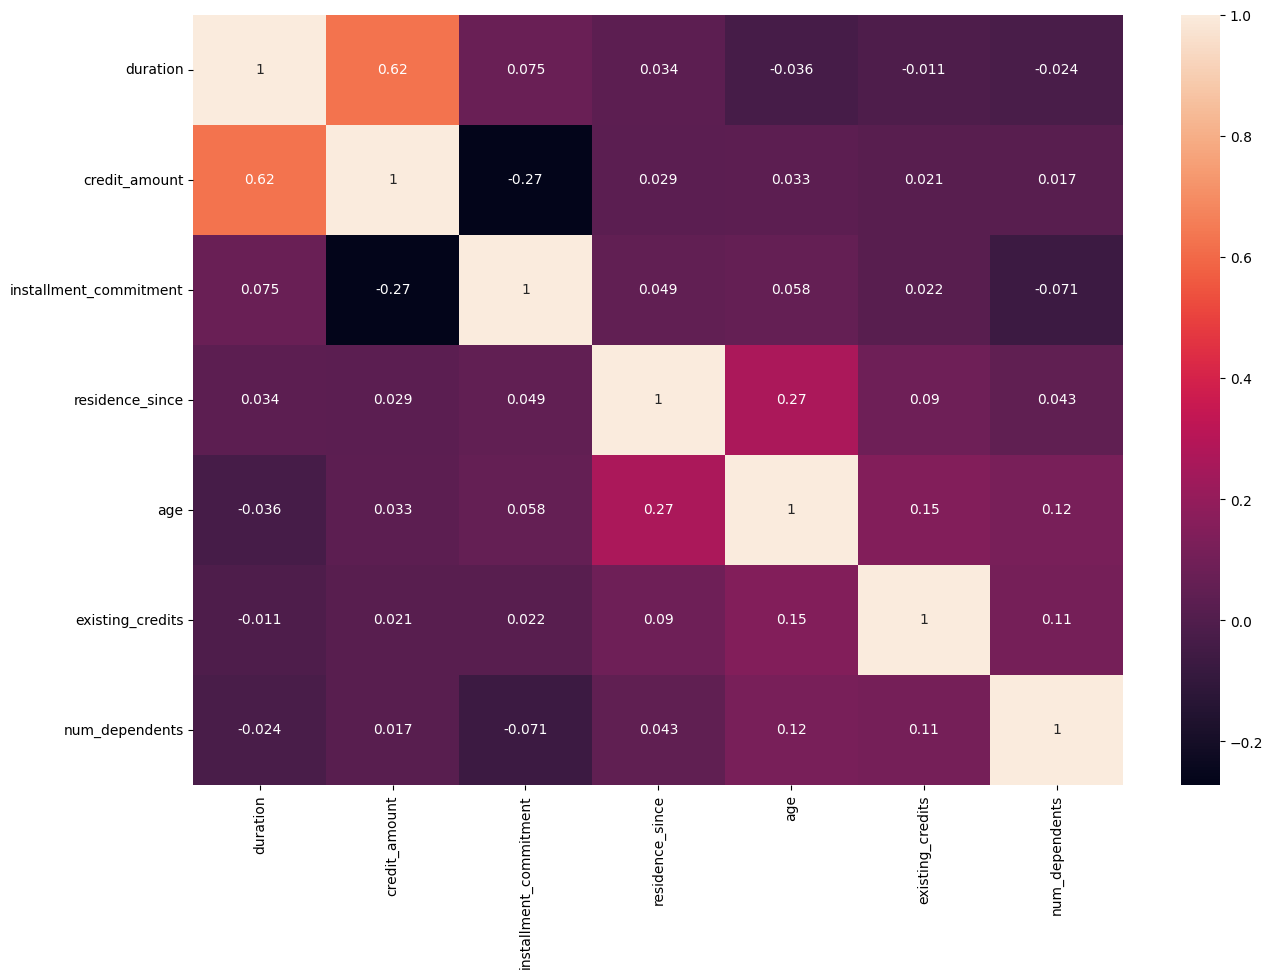

In [27]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

In [28]:
numeric_data

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1
997,12,804,4,4,38,1,1
998,45,1845,4,4,23,1,1


### Numeric Data Visualisation

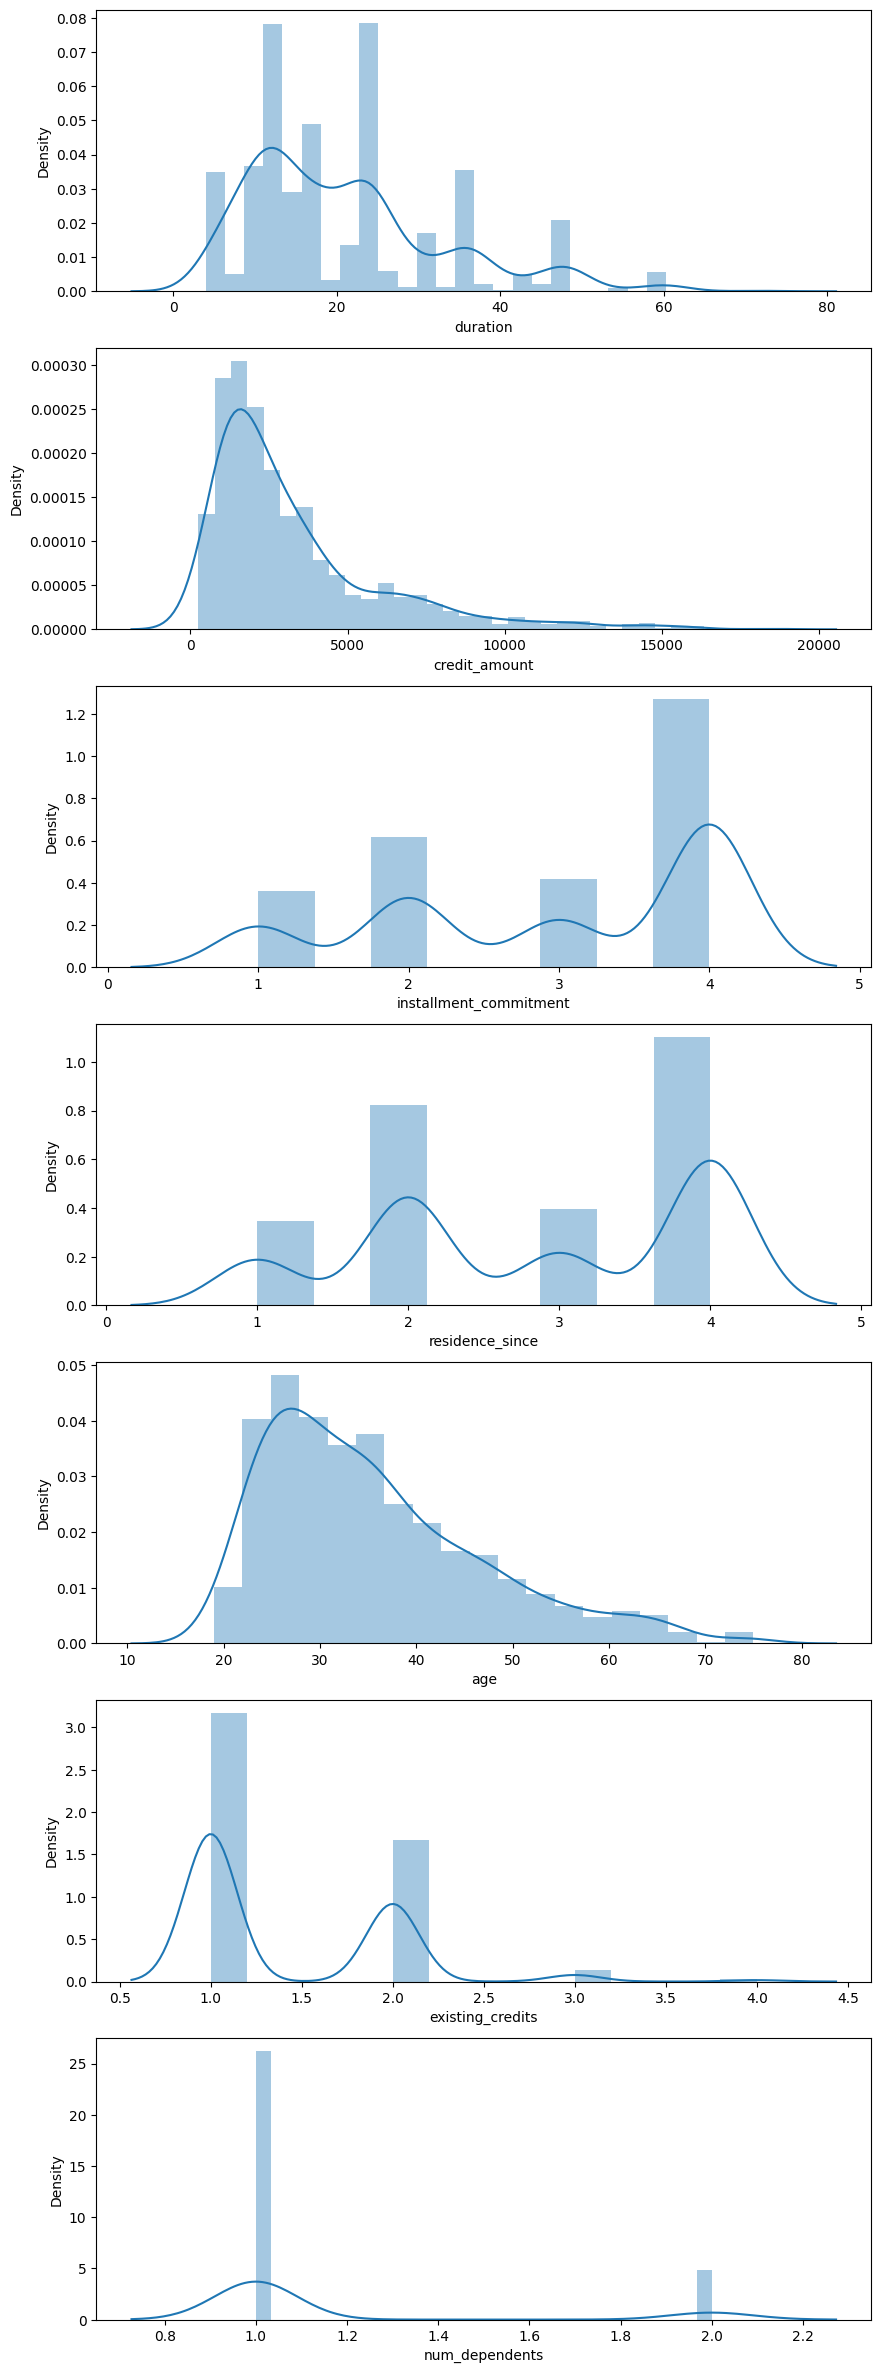

In [29]:
plt.figure(figsize=(10,30), facecolor='white')
plotnumber = 1

for column in numeric_data:
    if plotnumber<=7 :     
        ax = plt.subplot(7,1,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

### Boxplots

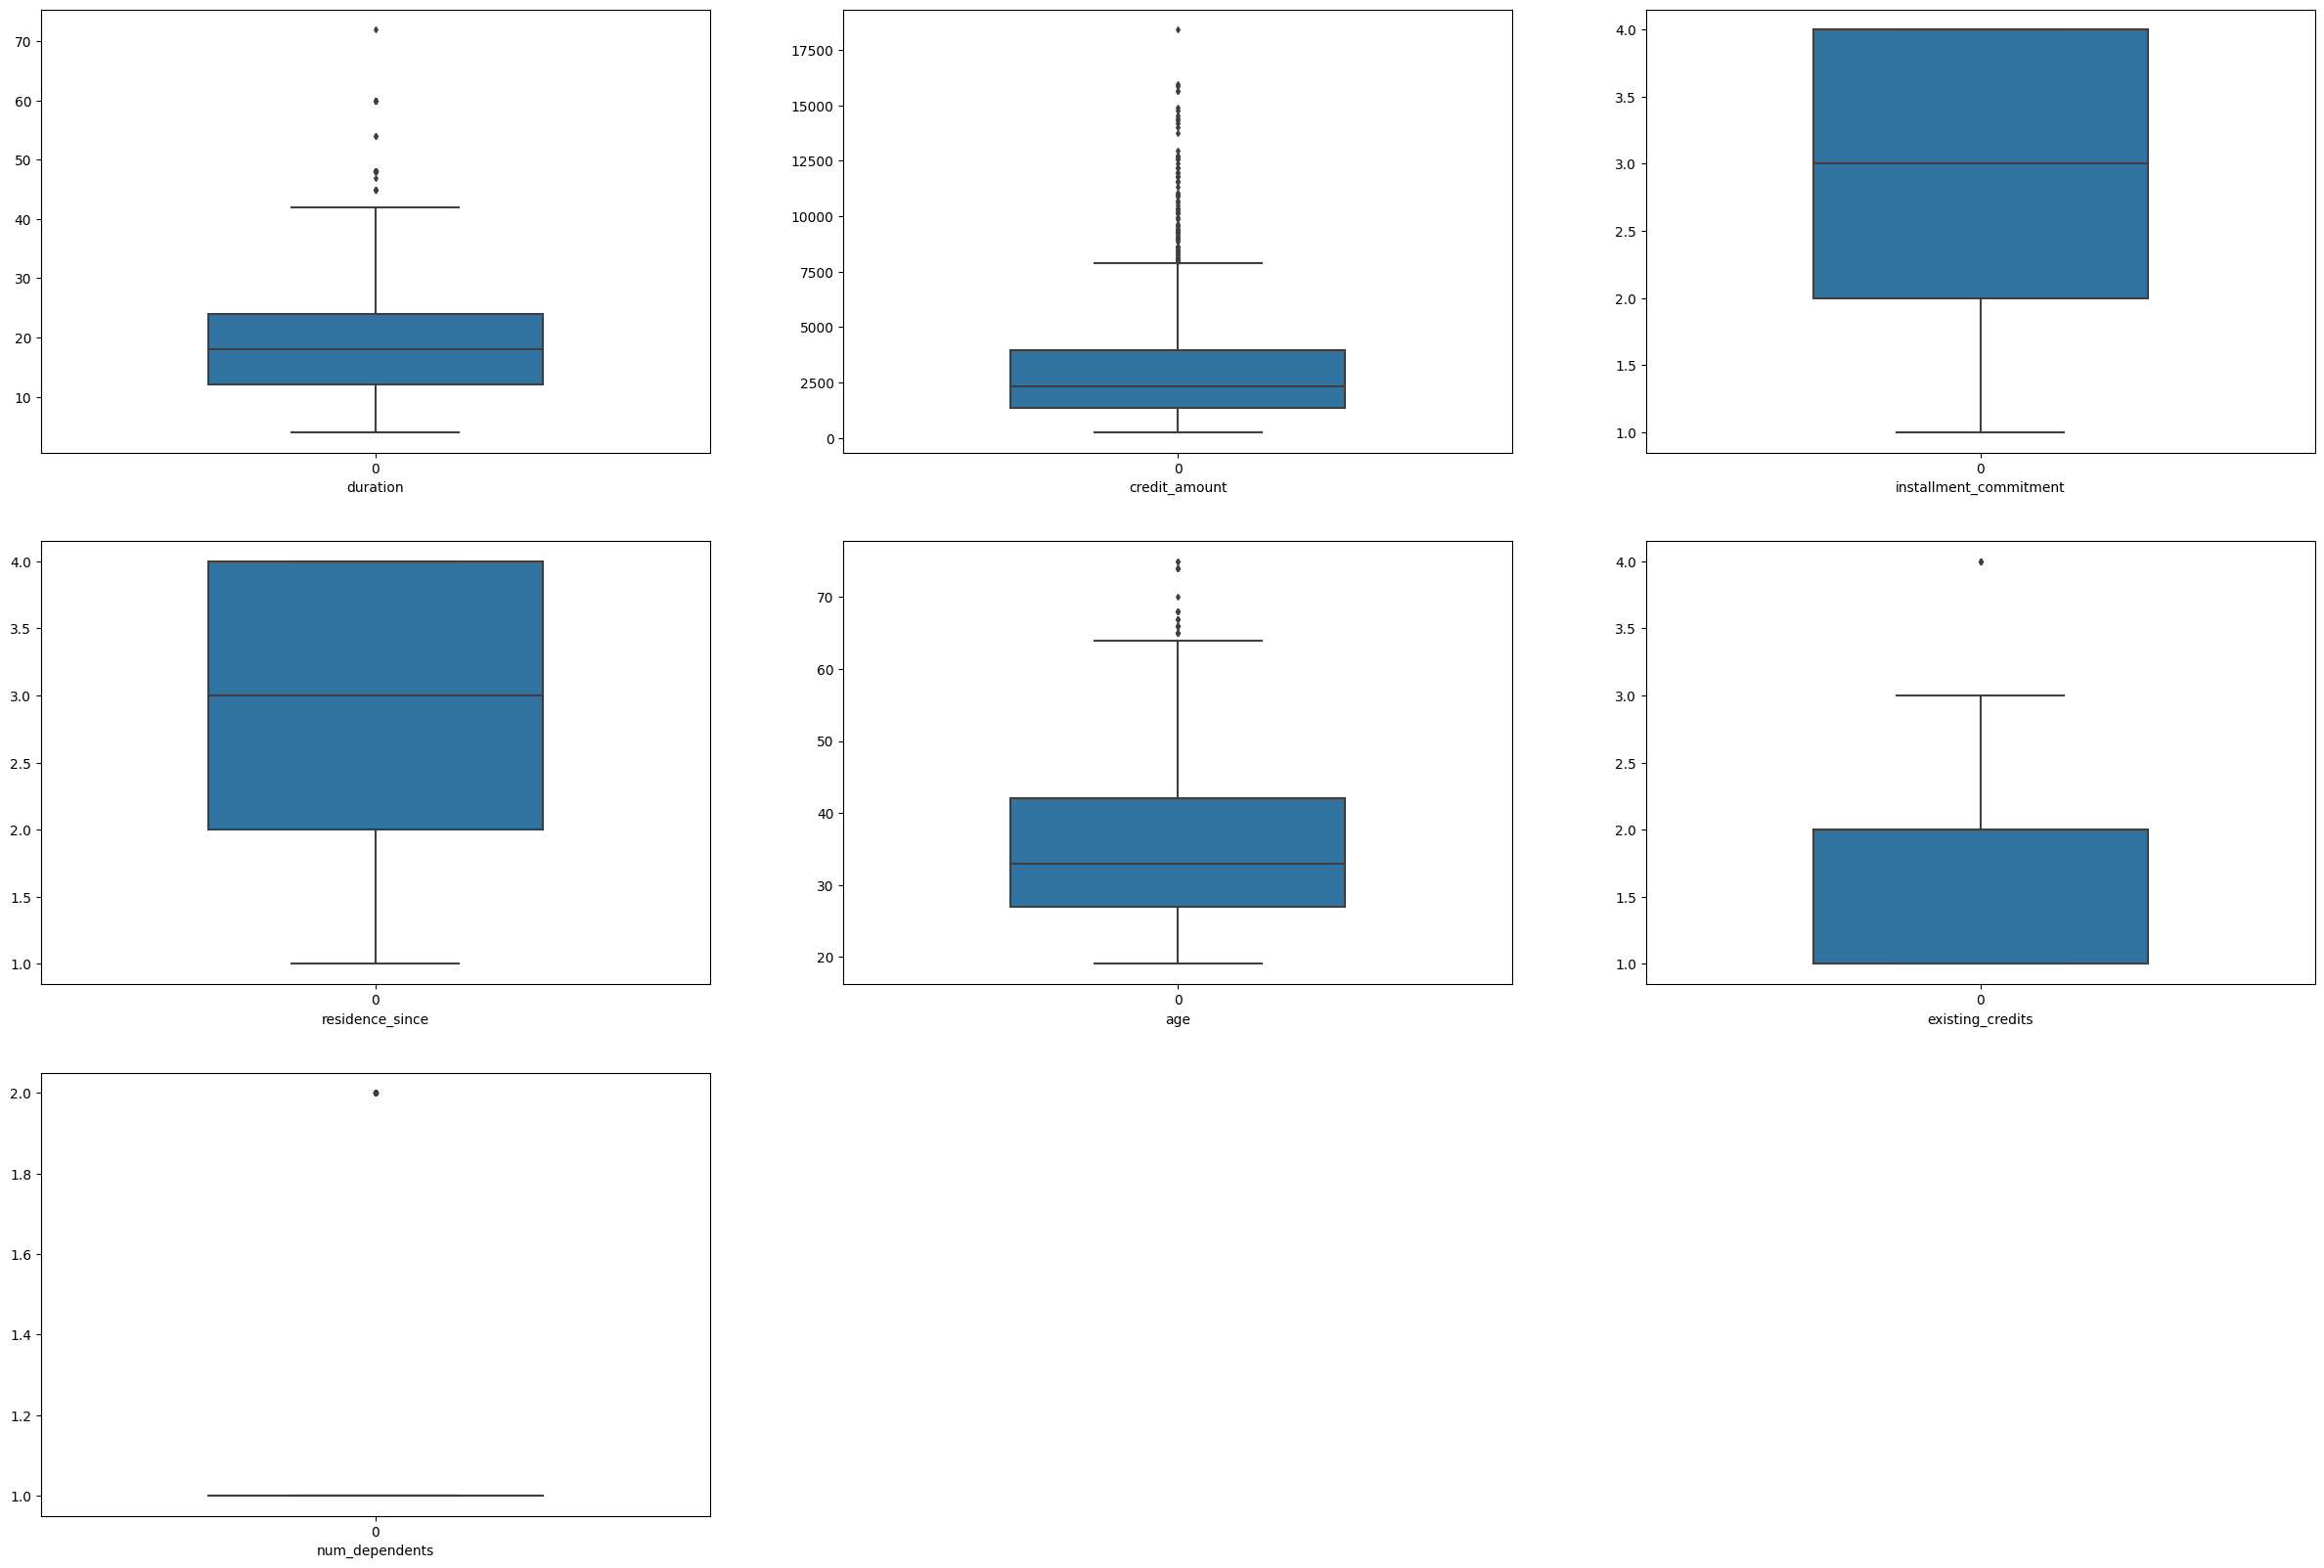

In [30]:
fig, ax = plt.subplots(figsize=(30,20))
plotnumber = 1

for column in numeric_data:
    if plotnumber<=7 :     
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data=df[column], width= 0.5,ax=ax,  fliersize=3)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()
    



### Imputing Outliers

In [33]:
def limit_imputer(value):
    if(value>upper_limit):
        return upper_limit
    elif(value<lower_limit):
        return lower_limit
    else:
        return value

In [34]:
mean=df["credit_amount"].mean()
std=df["credit_amount"].std()
upper_limit=mean+3*std
lower_limit=mean-3*std
df['credit_amount']=df['credit_amount'].apply(limit_imputer)

Text(0.5, 0, 'credit_amount')

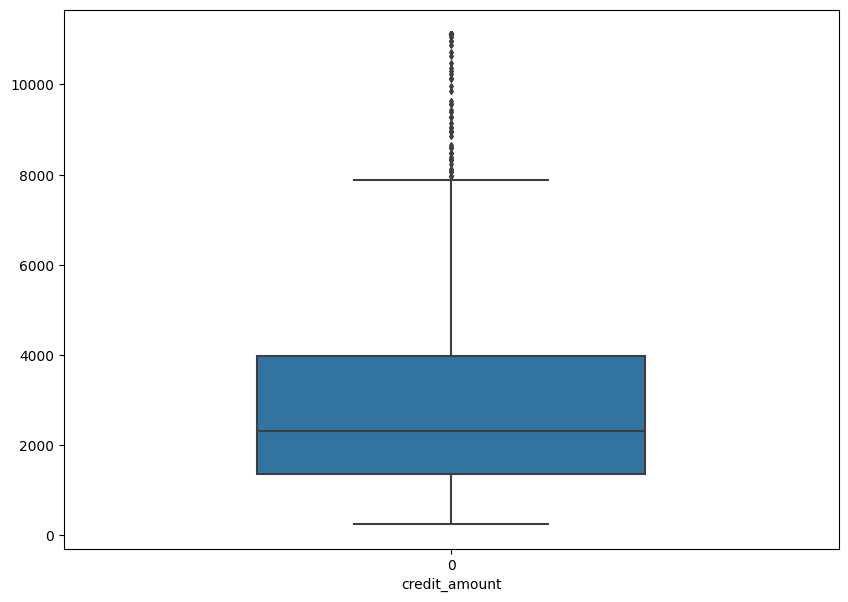

In [35]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(data=df["credit_amount"], width= 0.5,ax=ax,  fliersize=3)
plt.xlabel("credit_amount",fontsize=10)

### Feature Scaling

In [36]:
for i in numeric_data:
    df[i]=np.log(df[i]+1)

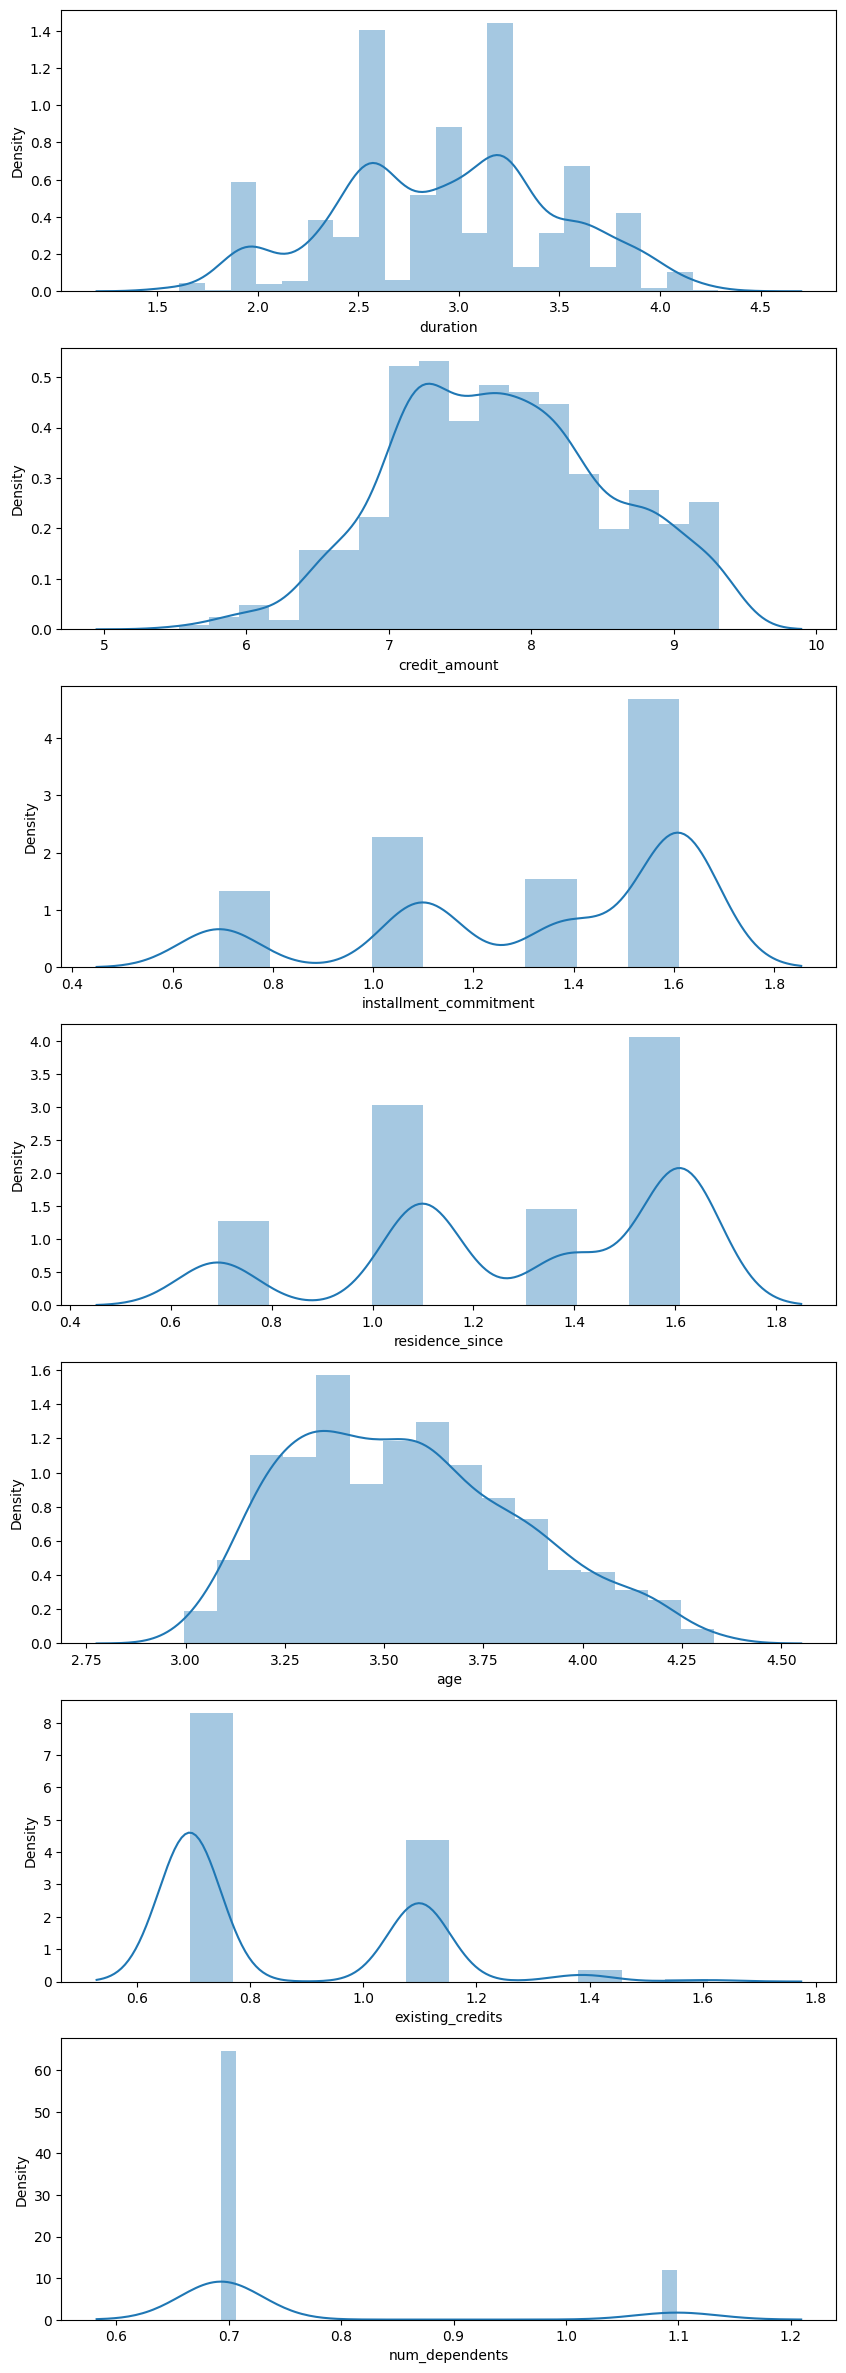

In [37]:
plt.figure(figsize=(10,30), facecolor='white')
plotnumber = 1

for column in numeric_data:
    if plotnumber<=7 :     
        ax = plt.subplot(7,1,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radio/tv'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'new car'),
  Text(4, 0, 'used car'),
  Text(5, 0, 'business'),
  Text(6, 0, 'domestic appliance'),
  Text(7, 0, 'repairs'),
  Text(8, 0, 'other'),
  Text(9, 0, 'retraining')])

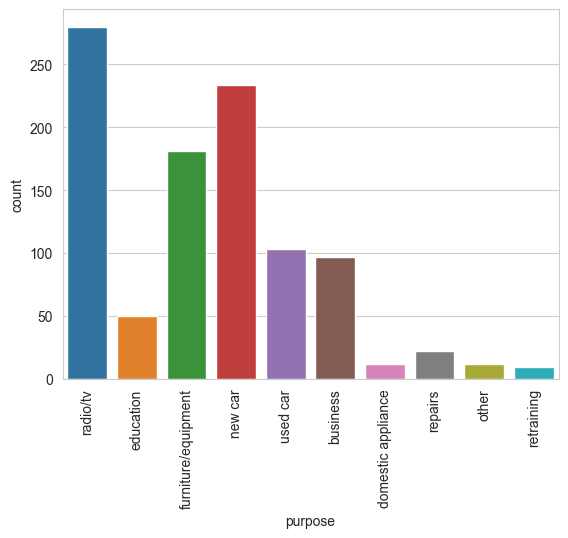

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='purpose',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'real estate'),
  Text(1, 0, 'life insurance'),
  Text(2, 0, 'no known property'),
  Text(3, 0, 'car')])

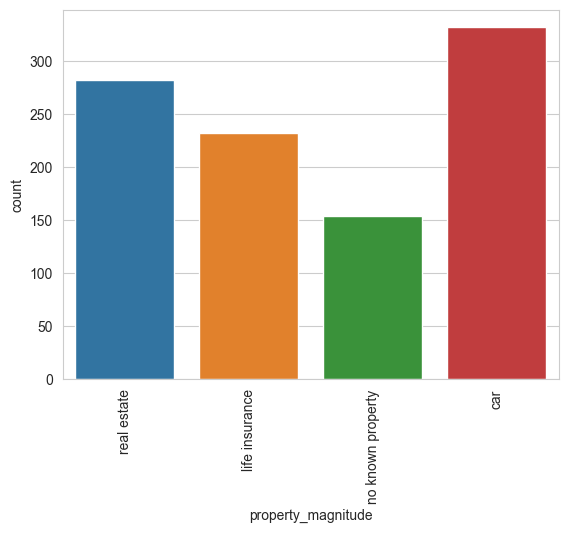

In [39]:

sns.set_style('whitegrid')
sns.countplot(x='property_magnitude',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radio/tv'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'new car'),
  Text(4, 0, 'used car'),
  Text(5, 0, 'business'),
  Text(6, 0, 'domestic appliance'),
  Text(7, 0, 'repairs'),
  Text(8, 0, 'other'),
  Text(9, 0, 'retraining')])

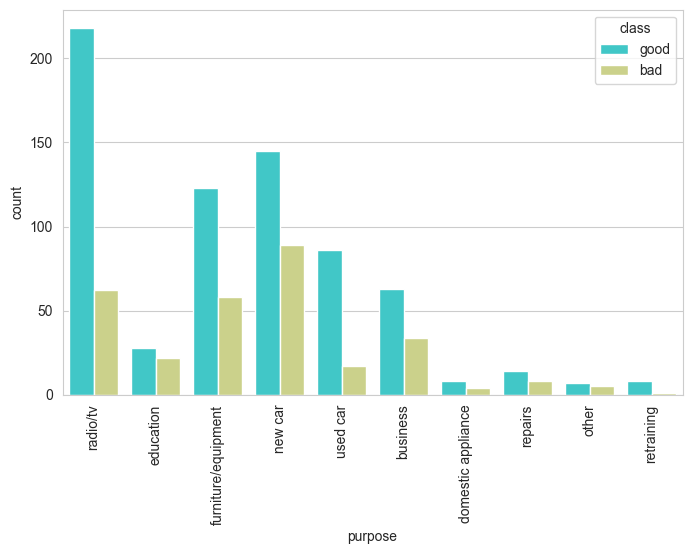

In [40]:
plt.figure(figsize=(8,5), facecolor='white')

sns.set_style('whitegrid')
sns.countplot(x='purpose',hue='class',data=df,palette='rainbow')
plt.xticks(rotation=90)

<AxesSubplot: xlabel='class', ylabel='count'>

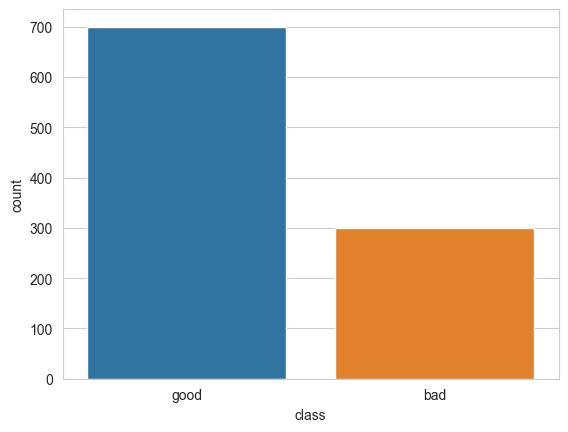

In [41]:
sns.countplot(x='class',data=df)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'critical/other existing credit'),
  Text(1, 0, 'existing paid'),
  Text(2, 0, 'delayed previously'),
  Text(3, 0, 'no credits/all paid'),
  Text(4, 0, 'all paid')])

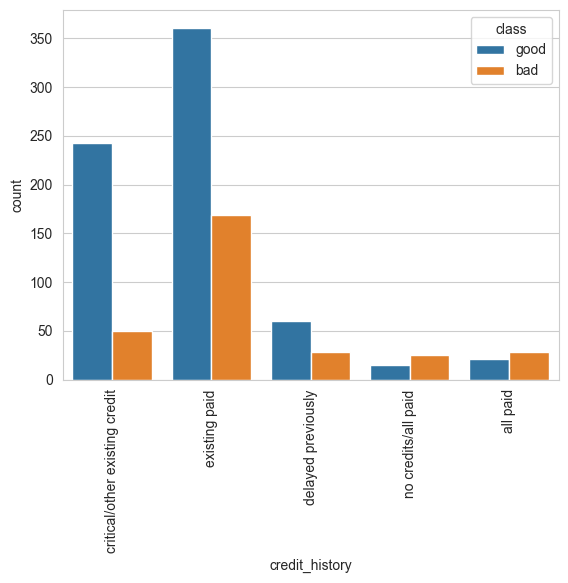

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='credit_history',hue='class',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '>=7'),
  Text(1, 0, '1<=X<4'),
  Text(2, 0, '4<=X<7'),
  Text(3, 0, 'unemployed'),
  Text(4, 0, '<1')])

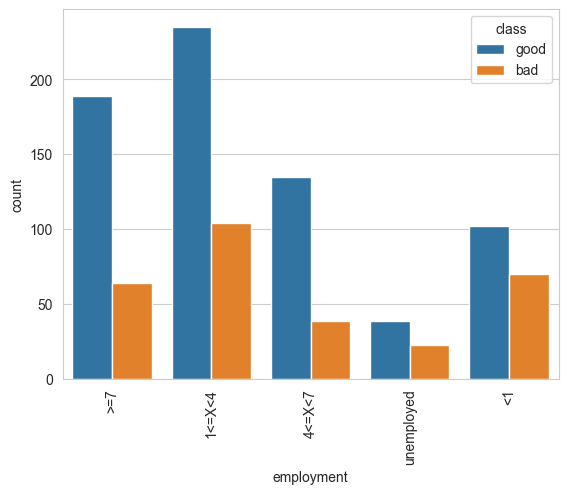

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='employment',hue='class',data=df)
plt.xticks(rotation=90)

### Label Encoding

In [44]:
cat_data = list(df.select_dtypes(exclude=[np.number]))
print(cat_data)

['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_data.columns:
    df[col] = le.fit_transform(df[col])

In [46]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,1.945910,1,6,7.064759,4,3,1.609438,3,2,...,3,4.219508,1,1,1.098612,1,0.693147,1,1,1
1,0,3.891820,3,6,8.691483,2,0,1.098612,0,2,...,3,3.135494,1,1,0.693147,1,0.693147,0,1,0
2,3,2.564949,1,2,7.648263,2,1,1.098612,3,2,...,3,3.912023,1,1,0.693147,3,1.098612,0,1,1
3,1,3.761200,3,3,8.972464,2,1,1.098612,3,1,...,1,3.828641,1,0,0.693147,1,1.098612,0,1,1
4,1,3.218876,2,4,8.491055,2,0,1.386294,3,2,...,2,3.988984,1,0,1.098612,1,1.098612,0,1,0


In [47]:
X = df.iloc[:,:-1]
y = df["class"]

In [48]:
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,1,1.945910,1,6,7.064759,4,3,1.609438,3,2,1.609438,3,4.219508,1,1,1.098612,1,0.693147,1,1
1,0,3.891820,3,6,8.691483,2,0,1.098612,0,2,1.098612,3,3.135494,1,1,0.693147,1,0.693147,0,1
2,3,2.564949,1,2,7.648263,2,1,1.098612,3,2,1.386294,3,3.912023,1,1,0.693147,3,1.098612,0,1
3,1,3.761200,3,3,8.972464,2,1,1.098612,3,1,1.609438,1,3.828641,1,0,0.693147,1,1.098612,0,1
4,1,3.218876,2,4,8.491055,2,0,1.386294,3,2,1.609438,2,3.988984,1,0,1.098612,1,1.098612,0,1


In [49]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: class, dtype: int32

### Train Test Split

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.25,random_state=0)

### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train,y_train)
y_preddtc = dtc.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmdtc = confusion_matrix(y_test, y_preddtc)
print(cmdtc)
accuracy_score(y_test, y_preddtc)

[[ 39  35]
 [ 43 133]]


0.688

In [53]:
from sklearn import tree

In [54]:
clf=tree.DecisionTreeClassifier(random_state=0)
dtc1=clf.fit(x_train,y_train)

[Text(0.5, 0.875, 'X[0] <= 1.5\ngini = 0.421\nsamples = 750\nvalue = [226, 524]'),
 Text(0.25, 0.625, 'X[11] <= 2.5\ngini = 0.493\nsamples = 410\nvalue = [181, 229]'),
 Text(0.125, 0.375, 'X[1] <= 3.795\ngini = 0.5\nsamples = 296\nvalue = [151, 145]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[1] <= 2.525\ngini = 0.388\nsamples = 114\nvalue = [30, 84]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[13] <= 0.5\ngini = 0.23\nsamples = 340\nvalue = [45, 295]'),
 Text(0.625, 0.375, 'X[12] <= 3.818\ngini = 0.461\nsamples = 36\nvalue = [13, 23]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[2] <= 1.5\ngini = 0.188\nsamples = 304\nvalue = [32, 272]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

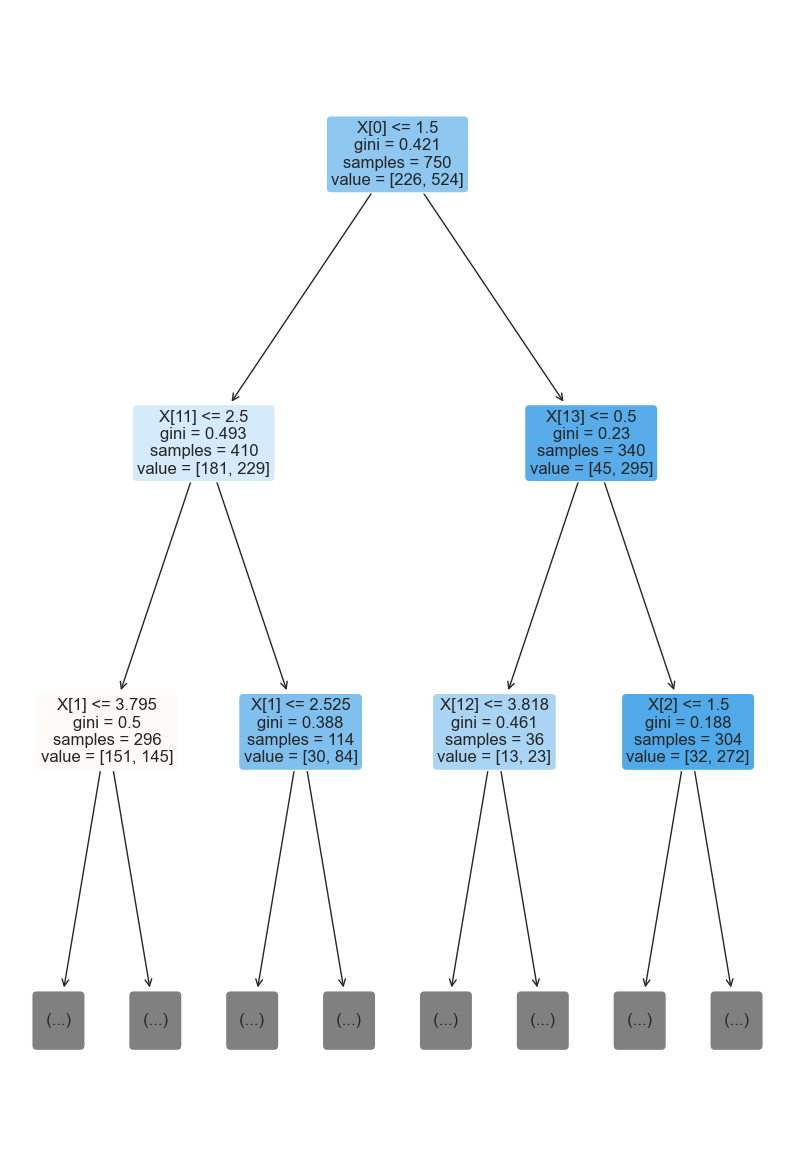

In [55]:
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(clf,filled=True,max_depth=2,fontsize=12,rounded = bool)

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc = rfc.fit(x_train,y_train)
y_predrfc = rfc.predict(x_test)

In [57]:
cmrfc = confusion_matrix(y_test, y_predrfc)
print(cmrfc)
accuracy_score(y_test, y_predrfc)

[[ 31  43]
 [ 17 159]]


0.76

### Gradient Boosting Tree

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                 criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1)
gbc.fit(x_train,y_train)
y_predgbc=gbc.predict(x_test)

In [68]:
cmgbc = confusion_matrix(y_test, y_predgbc)
print(cmgbc)
accuracy_score(y_test, y_predgbc)

[[ 39  35]
 [ 19 157]]


0.784

### XGBoost

In [69]:
from xgboost import XGBClassifier
# from xgboost.xgbclassifier import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_predxgb = xgb.predict(x_test)
predictions = [round(value) for value in y_predxgb]
accuracy_xgboost = accuracy_score(y_test,predictions)
accuracy_xgboost

0.764

### SVM

In [70]:
from sklearn.svm import SVC

In [71]:
svc = SVC(kernel='rbf', random_state=0)  
svc.fit(x_train, y_train)
y_predsvc = svc.predict(x_test)

In [72]:
cmsvc = confusion_matrix(y_test, y_predsvc)
print(cmsvc)
accuracy_score(y_test, y_predsvc)

[[  4  70]
 [  3 173]]


0.708

### Hyper parameters

model_params={
    'DecisionTree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [10,50,100]
        }
    },
    'Gradient_Boosting':{
        'model':GradientBoostingClassifier(subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1),
        'params':{
            'loss':['deviance', 'exponential'],
            'learning_rate':[0.001, 0.01, 0.1, 1.0],
            'n_estimators':[100,200],
            'max_depth':[3,5],
        }
    },
    'XGBoost':{
        'model':XGBClassifier(eval_metric = "logloss"),
        'params':{
            'max_depth':[3,5,7,9],
            'learning_rate':[0.001, 0.01, 0.1, 1.0],
            'min_child_weight':range(1,6,2),
            'n_estimators':[100,500]
            
        }
    }
}
    


### Tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
        
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

print(df1['best_params'][0])
print(df1['best_params'][1])
print(df1['best_params'][2])
print(df1['best_params'][3])

In [73]:
# DecisionTreeClassifier(**grid.best_params)

### AUC-ROC Curve

In [74]:
pred_prob1 = dtc.predict_proba(x_test)
pred_prob2 = rfc.predict_proba(x_test)
pred_prob3 = gbc.predict_proba(x_test)
pred_prob4 = xgb.predict_proba(x_test)

In [75]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [76]:
print(p_tpr)
print(y_test)

[0. 1.]
993    1
859    1
298    1
553    1
672    1
      ..
462    1
356    1
2      1
478    1
695    1
Name: class, Length: 250, dtype: int32


In [77]:

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])



In [78]:
print('Decision Tree:',auc_score1,'\nRandom Forest:',auc_score2,'\nGradient boost:',auc_score3,'\nXGBoost:',auc_score4)

Decision Tree: 0.6413544226044225 
Random Forest: 0.7778332309582311 
Gradient boost: 0.7708845208845209 
XGBoost: 0.7466984029484028


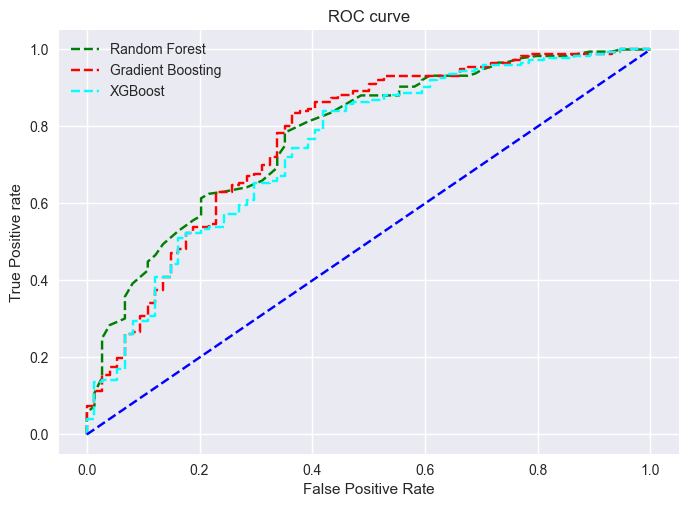

In [79]:
plt.style.use('seaborn')

# plot roc curves
# plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='DecisionTree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Gradient Boosting')
plt.plot(fpr4, tpr4, linestyle='--',color='cyan', label='XGBoost')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [80]:
from sklearn.metrics import log_loss
# print('',log_loss(y_test,pred_prob1))
print('Decision Tree:',log_loss(y_test,pred_prob1),'\nRandom Forest:',log_loss(y_test,pred_prob2),'\nGradient boost:',log_loss(y_test,pred_prob3),'\nXGBoost:',log_loss(y_test,pred_prob4))

Decision Tree: 10.776098235212134 
Random Forest: 0.5011419401637998 
Gradient boost: 0.5041495294208854 
XGBoost: 0.6800249273195222
